In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from src.recommendation_engine.content_based import ContentBasedRecommender
from src.recommendation_engine.collaborative import CollaborativeRecommender
from src.recommendation_engine.hybrid import HybridRecommender

In [2]:
# Initialize the Content-Based and Collaborative Filtering models
# Assuming you have your models already created
posts_csv_path = "data/processed/all_posts_with_features.csv"
interaction_csv_path = "data/processed/interaction_df.csv"

# Initialize the content and collaborative models
content_recommender = ContentBasedRecommender(posts_csv_path)
collaborative_recommender = CollaborativeRecommender(interaction_csv_path)

# Initialize the HybridRecommender
hybrid_recommender = HybridRecommender(content_model=content_recommender, collaborative_model=collaborative_recommender)

Loading interactions data from data/processed/interaction_df.csv...
Interactions DataFrame Loaded: (9781, 9) rows, columns: ['id', 'post_id', 'user_id', 'viewed_at', 'interaction_type', 'rating_percent', 'liked_at', 'inspired_at', 'rated_at']
     id  post_id  user_id            viewed_at interaction_type  \
0  9447     1256        1  2024-09-24 13:33:57           viewed   
1  9487     1253        1  2024-09-25 07:34:56           viewed   
2  9488     1257        1  2024-09-25 07:36:46           viewed   
3  9489     1258        1  2024-09-25 07:36:47           viewed   
4  9502     1252        1  2024-09-26 15:09:11           viewed   

   rating_percent liked_at inspired_at rated_at  
0             NaN      NaN         NaN      NaN  
1             NaN      NaN         NaN      NaN  
2             NaN      NaN         NaN      NaN  
3             NaN      NaN         NaN      NaN  
4             NaN      NaN         NaN      NaN  
Creating User-Post Interaction Matrix...
User-Post Mat

In [6]:
# Get true ratings (ground truth) from interaction data (e.g., user interactions)
interaction_df = pd.read_csv(interaction_csv_path)

# Select a valid user_id (assuming user_id exists in your dataset)
user_id = 1  # Example user_id

# Generate hybrid recommendations for the user
recommendations_df = hybrid_recommender.recommend_hybrid(user_id, top_n=10)

# Ensure recommendations_df contains both 'post_id' and 'weighted_score' columns
if 'weighted_score' in recommendations_df.columns:
    predicted_ratings = recommendations_df['weighted_score'].values
else:
    print("No predicted ratings available.")
    predicted_ratings = []

# Get true ratings corresponding to the recommended post_ids
# Filter interaction_df for only the posts in recommendations_df
true_ratings = interaction_df[interaction_df['post_id'].isin(recommendations_df['post_id'])]

# Now match the post_id's between the recommended posts and true ratings
# Align true ratings with the recommended post_ids
true_ratings = true_ratings.set_index('post_id')['rating_percent'].loc[recommendations_df['post_id']].values

# Ensure that true_ratings and predicted_ratings are aligned
if len(true_ratings) != len(predicted_ratings):
    # If the lengths don't match, trim the predicted_ratings to match true_ratings
    print(f"Warning: Mismatch between true ratings and predicted ratings length: {len(true_ratings)} != {len(predicted_ratings)}")
    min_len = min(len(true_ratings), len(predicted_ratings))
    true_ratings = true_ratings[:min_len]
    predicted_ratings = predicted_ratings[:min_len]

Generating hybrid recommendations for user: 1
Post ID 1 not found in posts data.
Generating recommendations for user_id: 1
Top-10 Recommendations for user_id 1:
   post_id       score
0       82  123.161119
1       85  113.963287
2      837  104.530852
3      722  104.102783
4      658  103.941377
5      363  103.759528
6      845   99.798276
7      209   99.294035
8     1202   97.733980
9      922   97.080322
Content-Based Recommendations: Empty DataFrame
Columns: [post_id, score]
Index: []
Collaborative Recommendations:    post_id       score
0       82  123.161119
1       85  113.963287
2      837  104.530852
3      722  104.102783
4      658  103.941377
5      363  103.759528
6      845   99.798276
7      209   99.294035
8     1202   97.733980
9      922   97.080322
Final Hybrid Recommendations:   post_id  weighted_score
0      82       86.212784
1      85       79.774301
6     837       73.171597
5     722       72.871948
4     658       72.758964
3     363       72.631670
7     8

/mnt/d/Users/RJ/Career_Growth/Career Development/Job application/Internshala/AI Intern at Persist Ventures/Video-Recommendation-Assignment-Acaac/src/recommendation_engine/hybrid.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([content_df, collaborative_df], ignore_index=True)


In [9]:
# Calculate MAE and RMSE
mae = mean_absolute_error(true_ratings, predicted_ratings)
rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))

# Print the evaluation metrics
print(f"Hybrid Model - Mean Absolute Error (MAE): {mae}")
print(f"Hybrid Model - Root Mean Square Error (RMSE): {rmse}")

ValueError: Input contains NaN.

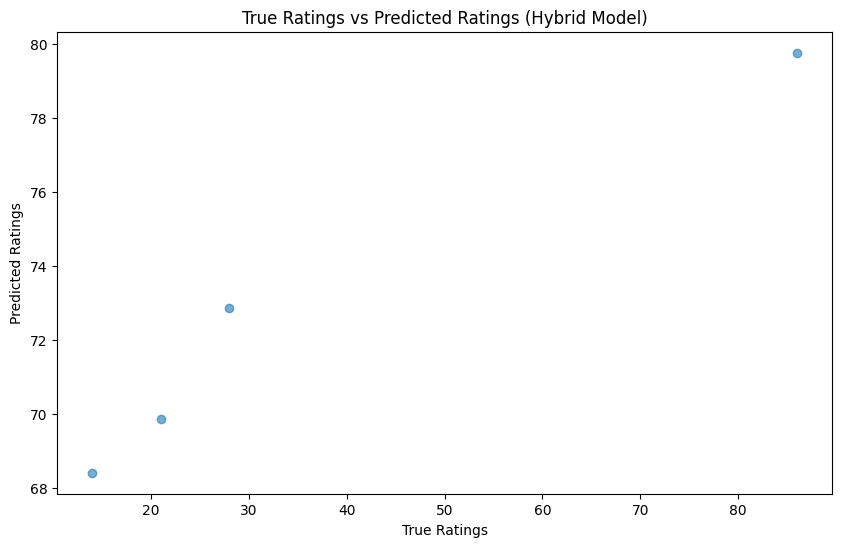

In [8]:
# Visualize the results (you can modify this part based on your needs)
import matplotlib.pyplot as plt

# Plot a comparison of predicted vs true ratings
plt.figure(figsize=(10, 6))
plt.scatter(true_ratings, predicted_ratings, alpha=0.6)
plt.plot([min(true_ratings), max(true_ratings)], [min(true_ratings), max(true_ratings)], color='red', linestyle='--')
plt.xlabel('True Ratings')
plt.ylabel('Predicted Ratings')
plt.title('True Ratings vs Predicted Ratings (Hybrid Model)')
plt.show()

In [ ]:
# Summarize Insights
print("Evaluation Insights:")
print(f"- The Mean Absolute Error (MAE) indicates the average difference between true and predicted ratings: {mae}")
print(f"- The Root Mean Square Error (RMSE) penalizes large differences more, indicating how well the model's predictions fit the actual ratings: {rmse}")